# Runge-Kutta methods

In [79]:
using Plots
pyplot()

Plots.PyPlotBackend()

We will implement in Julia different numerical methods to solve

$$
y'(t) = 1 - y(t)
$$

$ t \in [0,5] \qquad \mbox{ and } \qquad y(0) = 0 $

## Explicit Euler


In [80]:
"""

   euler(f::Function, t::Float64, y::Float64, dt::Float64)

explicit euler method function that returns

```math
y^{n+1} = y^n + dt \\cdot f(t^n, y^n) 
```

*Example*

```julia-repl
julia> f(t, y) =  1 - y
julia> euler(f, 0.0, 0.0, 1.0)
1.0, 1.0
```

"""
function euler(f::Function, t::Float64, y::Float64, dt::Float64)
    t + dt, y + dt * f(t,y)
end

euler

In [81]:
?euler

search: euler euler! schedule NamedTuple promote_rule baremodule parentmodule



euler(f::Function, t::Float64, y::Float64, dt::Float64)

explicit euler method function that returns

$$
y^{n+1} = y^n + dt \cdot f(t^n, y^n) 
$$

*Example*

```julia-repl
julia> f(t, y) =  1 - y
julia> euler(f, 0.0, 0.0, 1.0)
1.0, 1.0
```


## Runge-Kutta 2nd order

In [ ]:
"""

   rk2(f::Function, t::Float64, y::Float64,  dt::Float64)

Runge-Kutta second order method function

# Examples
```jldoctest
julia> f(t,y) = 1 - y
julia> rk2(f, 0.0, 0.0, 1.0)
(1.0, 0.5)
```

"""
function rk2(f::Function, t::Float64, y::Float64,  dt::Float64) 
    ỹ = y + f(t,y)*dt/2
    t + dt, y + f(t+dt/2,ỹ)*dt
end

In [ ]:
?rk2

In [83]:
f(t,y) = 1 - y
rk2(f, 0.0, 0.0, 1.0)

(1.0, 0.5)

In [84]:
?rk2

search: rk2



rk2(f::Function, t::Float64, y::Float64,  dt::Float64)

Runge-Kutta second order method function

# Examples

```jldoctest
julia> f(t,y) = 1 - y
julia> rk2(f, 0.0, 0.0, 1.0)
(1.0, 0.5)
```


## Runge-Kutta 4th order

In [85]:
"""

   rk4(f::Function, t::Float64, y::Float64,  dt::Float64)

Runge-Kutta fourth order method function

[Runge–Kutta methods on Wikipedia](https://en.wikipedia.org/wiki/Runge–Kutta_methods)

"""
function rk4(f::Function, t::Float64, y::Float64,  dt::Float64)

    y₁ = dt * f(t,y)
    y₂ = dt * f(t+dt/2,y+y₁/2)
    y₃ = dt * f(t+dt/2,y+y₂/2)
    y₄ = dt * f(t+dt,y+y₃)

    t+dt, y+(y₁+2*y₂+2*y₃+y₄)/6
    
end

rk4

In [86]:
?rk4

search: rk4



rk4(f::Function, t::Float64, y::Float64,  dt::Float64)

Runge-Kutta fourth order method function

[Runge–Kutta methods on Wikipedia](https://en.wikipedia.org/wiki/Runge–Kutta_methods)


## Solver function

In [87]:
"""

    solver(f::Function, Method::Function, t₀::Float64,
                y₀::Float64, dt::Float64, nsteps::Int64)

Solve numerically the equation ``y' = f(t, y)``

with `y(t₀)= y₀` and `nsteps` time step `dt`

# Arguments
- `f::Function`: the function `f` of equation ``y' = f(t,y)``.
- `Method::Function`: numerical method from (tⁿ,yⁿ) returns ``(t^{n+1},y^{n+1})``


"""
function solver(f::Function, 
                Method::Function, 
                t₀::Float64,
                y₀::Float64, dt::Float64, nsteps::Int64)
    
    t = zeros(Float64,nsteps)
    y = similar(t)

    t[1] = t₀
    y[1] = y₀

    for i in 2:nsteps
       t[i], y[i] = Method(f,t[i-1],y[i-1], dt)
    end

    t, y
    
end

solver

In [88]:
?solver

search: solver



```
solver(f::Function, Method::Function, t₀::Float64,
            y₀::Float64, dt::Float64, nsteps::Int64)
```

Solve numerically the equation $y' = f(t, y)$

with `y(t₀)= y₀` and `nsteps` time step `dt`

# Arguments

  * `f::Function`: the function `f` of equation $y' = f(t,y)$.
  * `Method::Function`: numerical method from (tⁿ,yⁿ) returns $(t^{n+1},y^{n+1})$


In [89]:
f(t, y) = 1 - y
solver(f, euler, 0.0,0.0, 1.0, 1)

([0.0], [0.0])

In [94]:
nsteps  = 7
tfinal  = 5.0
t₀ = 0.
x₀ = 0.0

dt = tfinal / nsteps
f(t, x) = 1 - x

f (generic function with 1 method)

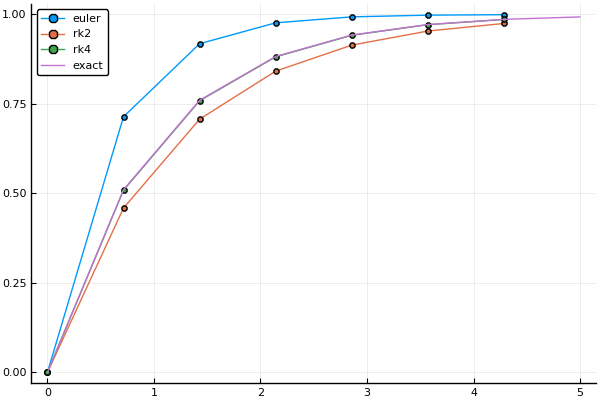

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [95]:
plot(solver(f, euler, t₀, x₀, dt, nsteps), marker = :o, label=:euler)
plot!(solver(f, rk2, t₀, x₀, dt, nsteps), marker= :o,   label=:rk2)
plot!(solver(f, rk4, t₀, x₀, dt, nsteps), marker = :o,  label=:rk4)
t = t₀:dt:tfinal
plot!(t, 1 .- exp.(-t),label = :exact)

Creating expressions via interpolation

We want to create a solver function with the method choosen at initialization.

In [96]:
macro make_method( meth) 
    return quote
        function (f::Function, t₀::Float64,
                  x₀::Float64, dt::Float64, nsteps::Int64)
        
            t = zeros(Float64,nsteps)
            x = zeros(Float64,nsteps)

            t[1] = t₀
            x[1] = x₀

            for i in 2:nsteps
               t[i], x[i] = $meth(f,t[i-1],x[i-1], dt)
            end

            return t, x
        end
    end
end

@make_method (macro with 1 method)

In [97]:
rk4_solver = @make_method rk4

#3 (generic function with 1 method)

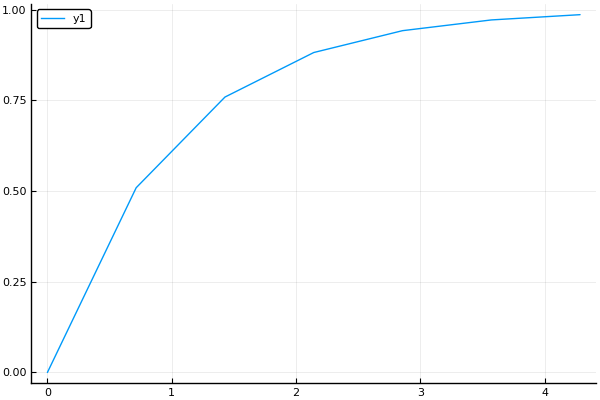

In [98]:
plot(rk4_solver(f, t₀, x₀, dt, nsteps))

[Reference](https://www.juliabloggers.com/runge-kutta-methods/):Ordinary Differential Equation Solvers: Runge-Kutta Methods by Christina Lee